In [7]:
!pip install nlp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk

In [14]:
# To read the dataset
train =  pd.read_csv('/content/dataset.csv', nrows=7000)

# To find the shape of the dataset
train.shape

(7000, 2)

In [18]:
# Finding word count in each review
train['word_count'] = train['text'].apply(lambda x: len(x.split()))
train.head()


,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184
3,Even though I have great interest in Biblical ...,0,69
4,Im a die hard Dads Army fan and nothing will e...,1,178


In [19]:

# Calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    return pol

train['polarity'] = train['text'].apply(get_polarity)

train.head()


,text,label,word_count,polarity
0,I grew up (b. 1965) watching and loving the Th...,0,151,0.123287
1,"When I put this movie in my DVD player, and sa...",0,326,0.131345
2,Why do people who do not know what a particula...,0,184,-0.041369
3,Even though I have great interest in Biblical ...,0,69,-0.135714
4,Im a die hard Dads Army fan and nothing will e...,1,178,0.123256


In [20]:
import string

# Remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

train['text'] = train['text'].apply(punctuation_removal)

In [21]:
# A function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train['text'] = train['text'].apply(drop_numbers)

In [25]:
nltk.download('wordnet')
nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# for lemmatisation
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word.lower()) for word in text_tokens]
    return ' '.join(text_lemm)

train['text'] = train['text'].apply(lemmatise)

In [26]:
# For Stopwords Removal
from nltk.corpus import stopwords
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

train['text'] = train['text'].apply(remove_stopword)

In [27]:
# TF-IDF Representation
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 3000)

x = tf.fit_transform(train['text']).toarray()
y = train.iloc[:, 1].values

print(x.shape)
print(y.shape)

(7000, 3000)
(7000,)


In [28]:
#Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4900, 3000)
(4900,)
(2100, 3000)
(2100,)


In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8771428571428571
Testing Accuracy : 0.7661904761904762


In [30]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[810, 248],
       [243, 799]])

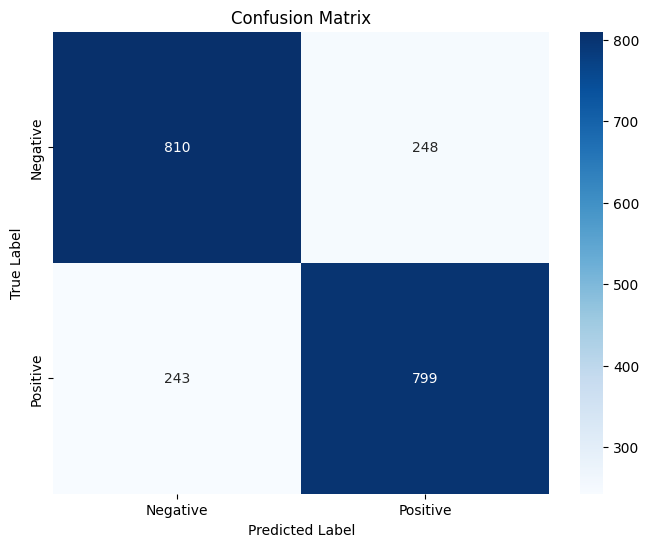

In [35]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
